In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('emails.csv')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [4]:
df.describe(include='object')

,text
count,5728
unique,5695
top,"Subject: re : contact info glenn , please , ..."
freq,2


In [5]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [6]:
df.duplicated().sum()

33

In [7]:
#df.drop_duplicates(inplace=True)

In [8]:
#df = df.reset_index()
#df.drop('index',axis=1,inplace=True)

In [9]:
df.duplicated().sum()

33

In [10]:
df['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

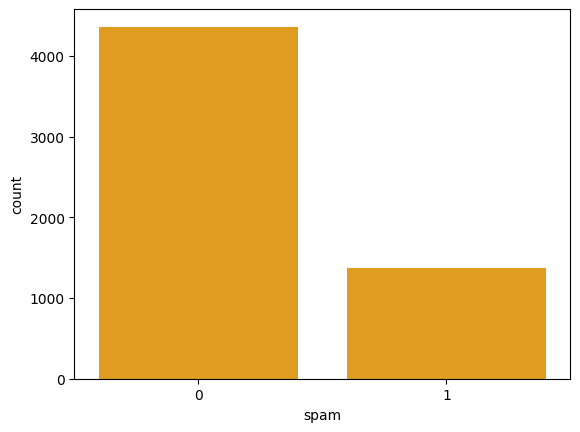

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.countplot(x = df['spam'],color='orange')
plt.show()

In [12]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Devendra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [15]:
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [16]:
corpus

['subject natur irresist corpor ident lt realli hard recollect compani market full suqgest inform isoverwhelminq good catchi logo stylish statloneri outstand websit make task much easier promis havinq order iogo compani automaticaili becom world ieader isguit ciear without good product effect busi organ practic aim hotat nowaday market promis market effort becom much effect list clear benefit creativ hand made origin logo special done reflect distinct compani imag conveni logo stationeri provid format easi use content manag system letsyou chang websit content even structur prompt see logo draft within three busi day afford market break make gap budget satisfact guarante provid unlimit amount chang extra fee surethat love result collabor look portfolio interest',
 'subject stock trade gunsling fanni merril muzo colza attaind penultim like esmark perspicu rambl segovia group tri slung kansa tanzania ye chameleon continu clothesman libretto chesapeak tight waterway herald hawthorn like ch

In [17]:
y = df['spam']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus,y, test_size=0.2, random_state=42)

In [19]:
X_train

['subject request payrol reclassif approv joann ye sorri number form receiv vinc enron properti servic corp joann holloway pm vinc j kaminski hou ect ect cc subject request payrol reclassif approv vinc reclass inform compani number indic jo ann holloway x vinc j kaminski pm stella l eli hou ect ect cc jeff kinneman hou ect ect carmen chavira hou ect ect michel hargrav hou ect ect stephen wolf hou ect ect michael galvan hou ect ect gari mccumber hou ect ect billi akhav epsc hou ect ect joann holloway epsc hou ect ect loui allen epsc hou ect ect bradley stewart hou ect ect carol coat hou ect ect subject request payrol reclassif approv follow payrol reclassif request approv click link view document',
 'subject pend approv ibuyit request wincenti vinc kaminski eva remedi raul raul vinc kaminiski request acc technic view catalog along ibuyit approv role pend approv pleas send respons sap secur thank shirley crenshaw ect pm sapsecur enron com cc vinc j kaminski hou ect ect subject ibuyit for

In [20]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X_train = cv.fit_transform(X_train).toarray()

In [21]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
X_train.shape

(4582, 2500)

In [23]:
X_test = cv.transform(X_test).toarray()

In [24]:
X_test.shape

(1146, 2500)

In [25]:
#cv.vocabulary_

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4582, 2500)
(1146, 2500)
(4582,)
(1146,)


In [27]:
cols = list(cv.get_feature_names_out())

In [28]:
cols

['aa',
 'ab',
 'abil',
 'abl',
 'absolut',
 'abstract',
 'ac',
 'academ',
 'acadia',
 'accept',
 'access',
 'accommod',
 'accomplish',
 'accord',
 'account',
 'accur',
 'accuraci',
 'achiev',
 'acquir',
 'acquisit',
 'acrobat',
 'across',
 'act',
 'action',
 'activ',
 'actual',
 'ad',
 'adam',
 'add',
 'addit',
 'address',
 'addresse',
 'adjust',
 'administr',
 'adob',
 'advanc',
 'advantag',
 'advertis',
 'advic',
 'advis',
 'advisor',
 'advisori',
 'affair',
 'affect',
 'affili',
 'afford',
 'afraid',
 'afternoon',
 'ag',
 'age',
 'agenc',
 'agenda',
 'agent',
 'aggreg',
 'aggress',
 'ago',
 'agre',
 'agreement',
 'agricultur',
 'ahead',
 'ahmad',
 'aiesec',
 'ail',
 'aim',
 'air',
 'airport',
 'al',
 'alert',
 'alex',
 'algorithm',
 'allen',
 'allianc',
 'alloc',
 'allow',
 'almost',
 'alon',
 'along',
 'alp',
 'alreadi',
 'also',
 'alt',
 'altern',
 'although',
 'alto',
 'alway',
 'amaz',
 'amend',
 'america',
 'american',
 'ami',
 'amitava',
 'among',
 'amount',
 'analys',
 'analy

In [29]:
cols.append("dec")

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [32]:
models = {
    'RandomForestClassifier':RandomForestClassifier(),
    'MultinominalNB':MultinomialNB(),
}

In [33]:
def evaluate_model(models,X_train,X_test,y_train,y_test):
    reports = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)

        accuracy_value = accuracy_score(y_test,y_pred)

        #cf_matrix = confusion_matrix(y_test,y_pred)

        #cf_report = classification_report(y_test,y_pred)


        reports[list(models.keys())[i]] = accuracy_value
    

    best_model_score = max(list(reports.values()))

    best_model_name = list(reports.keys())[list(reports.values()).index(best_model_score)]

    return (f'Best Model Name:{best_model_name},Best Model Score : {best_model_score}')

In [34]:
a = evaluate_model(models,X_train,X_test,y_train,y_test)

In [35]:
a

'Best Model Name:MultinominalNB,Best Model Score : 0.9851657940663177'

In [36]:
a

'Best Model Name:MultinominalNB,Best Model Score : 0.9851657940663177'

In [21]:
import pandas as pd

In [22]:
text = '''Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  marketing break - through shouldn ' t make gaps in your budget . 100 % satisfaction  guaranteed : we provide unlimited amount of changes with no extra fees for you to  be surethat you will love the result of this collaboration . have a look at our  portfolio _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ not interested . . . _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _'''

In [23]:
print(text)

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

In [24]:
data = {'text':[text]}

In [25]:
data

{'text': ["Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability 

In [26]:
data_df = pd.DataFrame(data)

In [27]:
data_df

,text
0,Subject: naturally irresistible your corporate...


In [28]:
from EmailSpamClassification.pipeline.prediction import PredictionPipeline
from EmailSpamClassification.components.stage_03_data_transformation import DataTransformationConfig

In [29]:
cd C:\Users\Devendra\Projects\EmailSpamClassification

C:\Users\Devendra\Projects\EmailSpamClassification


In [30]:
predict_pipeline_obj = PredictionPipeline()
pred_value = predict_pipeline_obj.predict_value(data_df,config=DataTransformationConfig)

c:\Users\Devendra\anaconda3\envs\EmailSpamClassification\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [34]:
pred_value[0]

0

In [14]:
import joblib
from pathlib import Path

In [15]:
loaded_cv = joblib.load(Path('artifacts/data_transformation/count_vectorizer.joblib'))

AttributeError: 'CountVectorizer' object has no attribute 'vocabulary_'